# Data exploration

In [1]:
import os
import pandas as pd
import numpy as np

def load_data(market):
    csv_path = os.path.join("CNNpred/", market)
    return pd.read_csv(csv_path)


## Exploring features in the markets
## Step 1: Uploading and inspecting the data

In [2]:
nyse_dataset = load_data("Processed_NYSE.csv")
nyse_dataset.head()

,Date,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,...,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
0,2009-12-31,7184.959961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39
1,2010-01-04,7326.740234,0.921723,0.019733,NaN,NaN,NaN,NaN,NaN,NaN,...,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10
2,2010-01-05,7354.870117,-0.375903,0.003839,0.019733,NaN,NaN,NaN,NaN,NaN,...,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12
3,2010-01-06,7377.700195,0.996234,0.003104,0.003839,0.019733,NaN,NaN,NaN,NaN,...,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77
4,2010-01-07,7393.930176,0.059932,0.002200,0.003104,0.003839,0.019733,NaN,NaN,NaN,...,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58


In [3]:
nyse_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 84 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1984 non-null   object 
 1   Close           1984 non-null   float64
 2   Volume          1983 non-null   float64
 3   mom             1983 non-null   float64
 4   mom1            1982 non-null   float64
 5   mom2            1981 non-null   float64
 6   mom3            1980 non-null   float64
 7   ROC_5           1979 non-null   float64
 8   ROC_10          1974 non-null   float64
 9   ROC_15          1969 non-null   float64
 10  ROC_20          1964 non-null   float64
 11  EMA_10          1975 non-null   float64
 12  EMA_20          1965 non-null   float64
 13  EMA_50          1935 non-null   float64
 14  EMA_200         1785 non-null   float64
 15  DTB4WK          1984 non-null   float64
 16  DTB3            1984 non-null   float64
 17  DTB6            1984 non-null   f

Brief evaluations:
- No. of attributes: 83
- Type of attributes: Most of them are of float 64, with the exceptions of 'Name' and 'Date' being object.
- Missing data: the max number of row is 1984, and several attributes have less than 1984 non-null entries. So there are missing data.

Prepare for concatinating attributes across markets together. Finding an the union of attributes across markets

In [4]:
dji_dataset = load_data("Processed_DJI.csv")
nasdaq_dataset = load_data("Processed_NASDAQ.csv")
russell_dataset = load_data("Processed_RUSSELL.csv")
sp_dataset = load_data("Processed_S&P.csv")

In [5]:
a = nyse_dataset.columns 
b = dji_dataset.columns
c = nasdaq_dataset.columns
d = russell_dataset.columns
e = sp_dataset.columns


unique_attributes = list(set().union(a,b,c,d,e))

In [6]:
print(len(unique_attributes))

86


In [7]:
unique_attributes

['GDAXI',
 'wheat-F',
 'GBP',
 'XAG',
 'DJI',
 'DTB4WK',
 'HSI',
 'Close',
 'Date',
 'Gold',
 'CTB1Y',
 'EMA_200',
 'NZD',
 'NASDAQ-F',
 'RUSSELL-F',
 'CTB6M',
 'NYSE',
 'mom2',
 'ROC_10',
 'mom',
 'EMA_50',
 'S&P',
 'S&P-F',
 'CNY',
 'MSFT',
 'DBAA',
 'IXIC',
 'CAC-F',
 'TE5',
 'copper-F',
 'FTSE',
 'DE4',
 'RUT',
 'TE2',
 'FCHI',
 'DGS5',
 'HSI-F',
 'FTSE-F',
 'GE',
 'mom3',
 'Name',
 'KOSPI-F',
 'DJI-F',
 'Dollar index',
 'DE2',
 'AAPL',
 'TE6',
 'DGS10',
 'AMZN',
 'DAX-F',
 'ROC_5',
 'CHF',
 'ROC_15',
 'DTB3',
 'JNJ',
 'CTB3M',
 'WFC',
 'EMA_10',
 'Volume',
 'DE6',
 'TE1',
 'TE3',
 'Dollar index-F',
 'ROC_20',
 'WIT-oil',
 'JPM',
 'XAU',
 'SSEC',
 'EUR',
 'silver-F',
 'GSPC',
 'GAS-F',
 'DAAA',
 'gold-F',
 'DTB6',
 'mom1',
 'JPY',
 'DE1',
 'Oil',
 'DE5',
 'AUD',
 'Nikkei-F',
 'CAD',
 'Brent',
 'XOM',
 'EMA_20']

Complete the NYSE dataset with attributes that it is missing compared to other dataset

In [8]:
nyse_missing_attributes = set(unique_attributes) - set(nyse_dataset.columns)
nyse_missing_attributes

{'GSPC', 'NYSE'}

In [9]:
nyse_dataset_complete = nyse_dataset.copy()
for i in nyse_missing_attributes:
    nyse_dataset_complete[i] = dji_dataset[i]

In [10]:
nyse_dataset_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 86 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1984 non-null   object 
 1   Close           1984 non-null   float64
 2   Volume          1983 non-null   float64
 3   mom             1983 non-null   float64
 4   mom1            1982 non-null   float64
 5   mom2            1981 non-null   float64
 6   mom3            1980 non-null   float64
 7   ROC_5           1979 non-null   float64
 8   ROC_10          1974 non-null   float64
 9   ROC_15          1969 non-null   float64
 10  ROC_20          1964 non-null   float64
 11  EMA_10          1975 non-null   float64
 12  EMA_20          1965 non-null   float64
 13  EMA_50          1935 non-null   float64
 14  EMA_200         1785 non-null   float64
 15  DTB4WK          1984 non-null   float64
 16  DTB3            1984 non-null   float64
 17  DTB6            1984 non-null   f

add missing attributes for other markets as well

In [11]:
def add_missing_attributes(dataset, unique_attributes):
    dataset_missing_attributes = set(unique_attributes) - set(dataset.columns)
    dataset_complete = dataset.copy()
    for i in dataset_missing_attributes:
        dataset_complete[i] = nyse_dataset_complete[i]
    return dataset_complete
    
dji_dataset_complete = add_missing_attributes(dji_dataset, unique_attributes)
nasdaq_dataset_complete = add_missing_attributes(nasdaq_dataset, unique_attributes)
russell_dataset_complete = add_missing_attributes(russell_dataset, unique_attributes)
sp_dataset_complete = add_missing_attributes(sp_dataset, unique_attributes)

## Step 2: handle missing data

First find all the attributes with missing values

In [12]:
l = []
for col in nyse_dataset_complete.columns:
    if (nyse_dataset_complete[col].count() < 1984):
        l.append(col)
l

['Volume',
 'mom',
 'mom1',
 'mom2',
 'mom3',
 'ROC_5',
 'ROC_10',
 'ROC_15',
 'ROC_20',
 'EMA_10',
 'EMA_20',
 'EMA_50',
 'EMA_200',
 'Oil',
 'Gold',
 'GBP',
 'JPY',
 'CAD',
 'CNY',
 'AAPL',
 'AMZN',
 'GE',
 'JNJ',
 'JPM',
 'MSFT',
 'WFC',
 'XOM',
 'FCHI',
 'FTSE',
 'GDAXI',
 'DJI',
 'HSI',
 'IXIC',
 'SSEC',
 'S&P',
 'RUT',
 'CTB3M',
 'CTB6M',
 'CTB1Y',
 'CAC-F',
 'DAX-F',
 'FTSE-F',
 'HSI-F',
 'KOSPI-F',
 'wheat-F',
 'NYSE',
 'GSPC']

In [13]:
nyse_dataset_complete['mom1'][:15]

0          NaN
1          NaN
2     0.019733
3     0.003839
4     0.003104
5     0.002200
6     0.004249
7     0.003192
8    -0.010552
9     0.008099
10    0.002474
11   -0.012315
12    0.011811
13   -0.015295
14   -0.021197
Name: mom1, dtype: float64

In [14]:
attributes_fillna_zero = ['Volume']
attributes_fillna_bfill = ['mom',
 'mom1',
 'mom2',
 'mom3',
 'ROC_5',
 'ROC_10',
 'ROC_15',
 'ROC_20']
attributes_fillna_interpolate = ['EMA_10',
 'EMA_20',
 'EMA_50',
 'EMA_200',
 'Oil',
 'Gold',
 'GBP',
 'JPY',
 'CAD',
 'CNY',
 'AAPL',
 'AMZN',
 'GE',
 'JNJ',
 'JPM',
 'MSFT',
 'WFC',
 'XOM',
 'FCHI',
 'FTSE',
 'GDAXI',
 'DJI',
 'HSI',
 'IXIC',
 'SSEC',
 'S&P',
 'RUT',
 'CTB3M',
 'CTB6M',
 'CTB1Y',
 'CAC-F',
 'DAX-F',
 'FTSE-F',
 'HSI-F',
 'KOSPI-F',
 'wheat-F',
 'GSPC',
 'NYSE']

In [15]:
def fill_missing_val(dataset, attributes_fillna_zero, attributes_fillna_bfill,attributes_fillna_interpolate):
    dataset_ans = dataset.copy()
    for col in attributes_fillna_zero:
        dataset_ans[col] = dataset[col].fillna(0)
    for col in attributes_fillna_bfill:
        dataset_ans[col] = dataset[col].fillna(method='bfill')
    for col in attributes_fillna_interpolate:
        dataset_ans[col] = dataset[col].interpolate().fillna(method='bfill')
    return dataset_ans

In [16]:
nyse = fill_missing_val(nyse_dataset_complete, attributes_fillna_zero, attributes_fillna_bfill,attributes_fillna_interpolate )

Fill in the missing values for other market with similar pipelines

In [17]:
dji = fill_missing_val(dji_dataset_complete, attributes_fillna_zero, attributes_fillna_bfill,attributes_fillna_interpolate)
nasdaq = fill_missing_val(nasdaq_dataset_complete, attributes_fillna_zero, attributes_fillna_bfill,attributes_fillna_interpolate)
russell = fill_missing_val(russell_dataset_complete, attributes_fillna_zero, attributes_fillna_bfill,attributes_fillna_interpolate)
sp = fill_missing_val(sp_dataset_complete, attributes_fillna_zero, attributes_fillna_bfill,attributes_fillna_interpolate)

## Splitting into Test and Train set

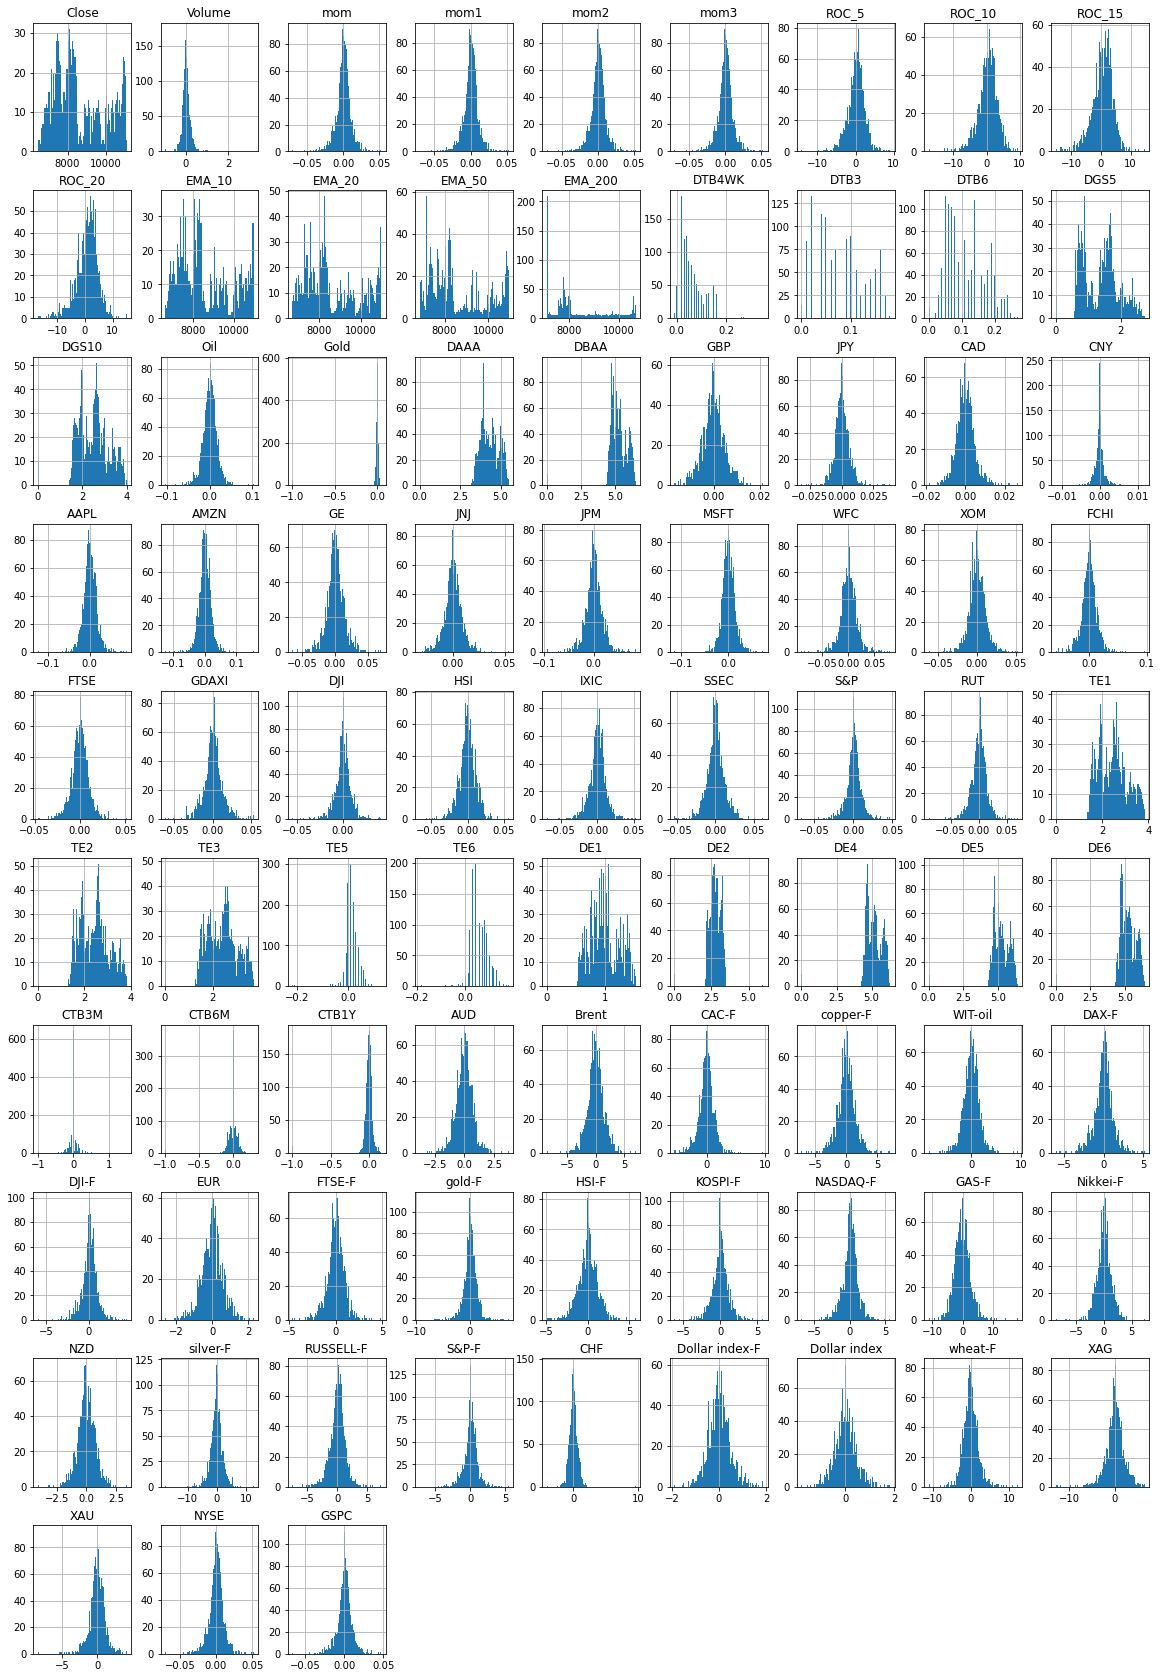

In [18]:
%matplotlib inline 
#so that the plot will be displayed in the notebook
import matplotlib.pyplot as plt

nyse[:1260].hist(bins=100, figsize=(20,30)) #2010-2014
plt.show()

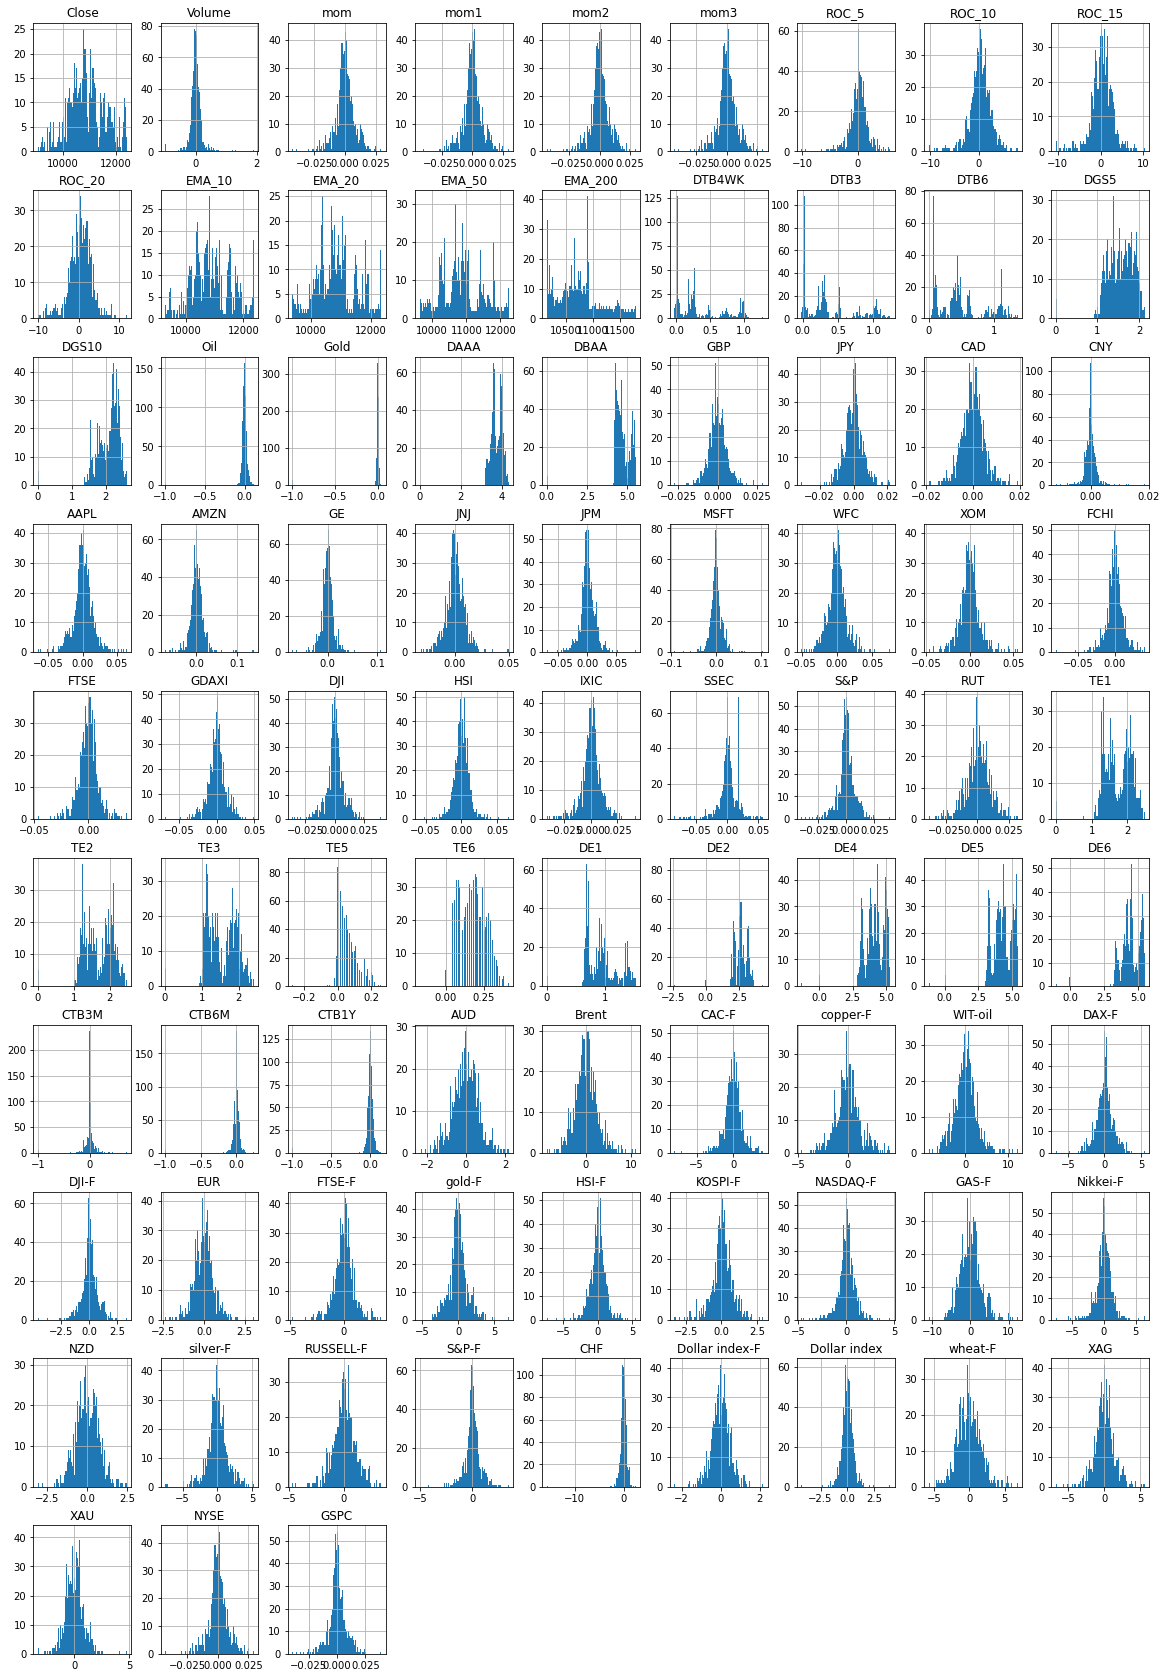

In [19]:
nyse[1260:].hist(bins=100, figsize=(20,30)) #2015-2016
plt.show()

Separating the data by years becuase they are time series data. Checking the distribution of the data across set is roughly even.

In [20]:
def getTrainTestset(dataset, index, index2):
    train = dataset[:index] # 2010-2014
    validation = dataset[index:index2] # 2015
    test = dataset[index2:] #2016-2017
    return train,validation,test

# dji
# nasdaq
# russell
# sp

nyse_train, nyse_validation, nyse_test = getTrainTestset(nyse, 1260,1511)
dji_train, dji_validation, dji_test = getTrainTestset(dji, 1260,1511)
nasdaq_train,nasdaq_validation, nasdaq_test = getTrainTestset(nasdaq, 1260,1511)
russell_train,russell_validation, ussell_test = getTrainTestset(russell, 1260,1511)
sp_train, sp_validation, sp_test = getTrainTestset(sp, 1260,1511)

## Step 3: Exploring the attributes

In [21]:
nysetrain = nyse_train.copy()

In [22]:
corr_matrix = nysetrain.corr()
corr_matrix

,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,...,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU,NYSE,GSPC
Close,1.000000,-0.005183,0.032792,0.029041,0.030659,0.026212,0.076411,0.110430,0.138845,0.158594,...,0.031968,0.038592,0.006248,0.009035,0.008730,-0.031060,-0.024501,-0.030204,0.032792,0.039562
Volume,-0.005183,1.000000,-0.012612,-0.020306,0.033491,-0.005173,-0.029109,-0.021298,-0.045927,-0.021712,...,-0.016545,0.005707,0.006755,0.006656,0.007559,0.031878,0.003225,-0.018686,-0.012612,-0.025677
mom,0.032792,-0.012612,1.000000,-0.036579,0.034867,-0.059124,0.431156,0.280114,0.235611,0.187165,...,0.895825,0.959684,-0.212410,-0.473974,-0.474966,0.184979,0.309104,0.137713,1.000000,0.982029
mom1,0.029041,-0.020306,-0.036579,1.000000,-0.033970,0.037328,0.412644,0.276155,0.237817,0.186782,...,-0.049772,-0.045125,0.061954,0.009797,0.013300,0.002528,0.045170,0.011132,-0.036579,-0.045719
mom2,0.030659,0.033491,0.034867,-0.033970,1.000000,-0.031650,0.457374,0.292113,0.245903,0.208034,...,0.024157,0.053048,0.026945,0.025639,0.028057,-0.008222,0.009058,-0.001551,0.034867,0.061793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wheat-F,-0.031060,0.031878,0.184979,0.002528,-0.008222,-0.029864,0.082447,0.042775,0.033471,0.048092,...,0.161020,0.160668,-0.134584,-0.176493,-0.173313,1.000000,0.183239,0.126817,0.184979,0.166636
XAG,-0.024501,0.003225,0.309104,0.045170,0.009058,-0.027279,0.151656,0.092929,0.099900,0.095483,...,0.247748,0.236198,-0.289566,-0.389363,-0.383013,0.183239,1.000000,0.803746,0.309104,0.247627
XAU,-0.030204,-0.018686,0.137713,0.011132,-0.001551,-0.018398,0.056375,0.015635,0.029052,0.031520,...,0.085343,0.072929,-0.306906,-0.329133,-0.323309,0.126817,0.803746,1.000000,0.137713,0.076572
NYSE,0.032792,-0.012612,1.000000,-0.036579,0.034867,-0.059124,0.431156,0.280114,0.235611,0.187165,...,0.895825,0.959684,-0.212410,-0.473974,-0.474966,0.184979,0.309104,0.137713,1.000000,0.982029


In [23]:
corr_matrix['Close'].sort_values(ascending=False)[:20]

Close       1.000000
EMA_10      0.996362
EMA_20      0.992697
EMA_50      0.984166
EMA_200     0.959867
ROC_20      0.158594
ROC_15      0.138845
ROC_10      0.110430
SSEC        0.077834
ROC_5       0.076411
DGS5        0.067463
MSFT        0.059294
GBP         0.053224
Nikkei-F    0.049802
JNJ         0.048723
JPY         0.042538
IXIC        0.042351
NASDAQ-F    0.041315
GSPC        0.039562
S&P         0.039562
Name: Close, dtype: float64

array([[<AxesSubplot:xlabel='Close', ylabel='Close'>,
        <AxesSubplot:xlabel='EMA_10', ylabel='Close'>,
        <AxesSubplot:xlabel='EMA_20', ylabel='Close'>,
        <AxesSubplot:xlabel='EMA_50', ylabel='Close'>,
        <AxesSubplot:xlabel='EMA_200', ylabel='Close'>],
       [<AxesSubplot:xlabel='Close', ylabel='EMA_10'>,
        <AxesSubplot:xlabel='EMA_10', ylabel='EMA_10'>,
        <AxesSubplot:xlabel='EMA_20', ylabel='EMA_10'>,
        <AxesSubplot:xlabel='EMA_50', ylabel='EMA_10'>,
        <AxesSubplot:xlabel='EMA_200', ylabel='EMA_10'>],
       [<AxesSubplot:xlabel='Close', ylabel='EMA_20'>,
        <AxesSubplot:xlabel='EMA_10', ylabel='EMA_20'>,
        <AxesSubplot:xlabel='EMA_20', ylabel='EMA_20'>,
        <AxesSubplot:xlabel='EMA_50', ylabel='EMA_20'>,
        <AxesSubplot:xlabel='EMA_200', ylabel='EMA_20'>],
       [<AxesSubplot:xlabel='Close', ylabel='EMA_50'>,
        <AxesSubplot:xlabel='EMA_10', ylabel='EMA_50'>,
        <AxesSubplot:xlabel='EMA_20', ylabel='EMA_5

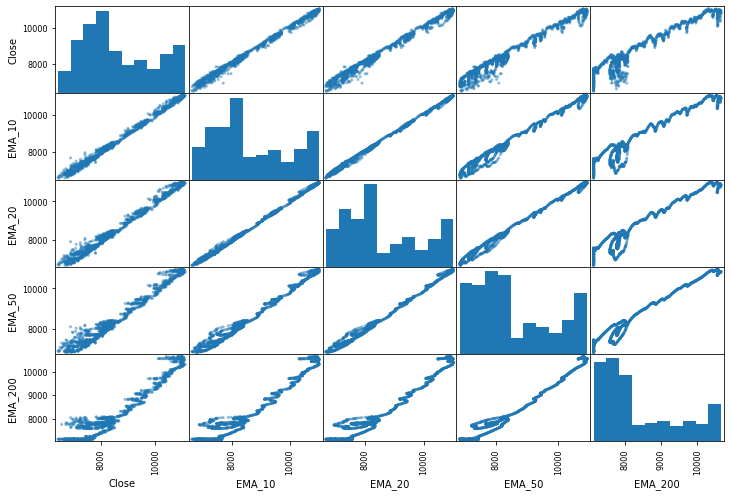

In [24]:
from pandas.plotting import scatter_matrix

attributes = ["Close", "EMA_10", "EMA_20", "EMA_50", "EMA_200"]
scatter_matrix(nysetrain[attributes], figsize=(12,8))

## Step 4: Data preparation and transformations for machine learning algorithms

In [25]:
nyse_prepared = nyse_train.copy()
dji_prepared = dji_train.copy()
nasdaq_prepared = nasdaq_train.copy()
russell_prepared = russell_train.copy()
sp_prepared = sp_train.copy()

# dji
# nasdaq
# russell
# sp

# # nyse_prepared = nysetrain.drop("close", axis=1)
# nyse_prepared_labels = nysetrain["close"].copy()

Use label enconder for date attribute.
And one-hot encoding for the market name attributes

In [26]:
from sklearn.preprocessing import LabelEncoder

def encodeDate(dataset):
    encoder = LabelEncoder()
    dataset_en = encoder.fit_transform(dataset["Date"])
    return dataset_en

def encodeDateName(markets):
    new_market = []
    new_market2 = []
    for index,m in enumerate(markets):
        m['Date'] = encodeDate(m)
        m['Name-nya'] = pd.Series([0 for x in range(len(m.index))], index=m.index)
        m['Name-dji'] = pd.Series([0 for x in range(len(m.index))], index=m.index)
        m['Name-nasdaq'] = pd.Series([0 for x in range(len(m.index))], index=m.index)
        m['Name-russell'] = pd.Series([0 for x in range(len(m.index))], index=m.index)
        m['Name-sp'] = pd.Series([0 for x in range(len(m.index))], index=m.index)
        if (m['Name'][0] == 'NYA'):
            m['Name-nya'] = pd.Series([1 for x in range(len(m.index))], index=m.index)
        elif (m['Name'][0] == 'DJI'):
            m['Name-dji'] = pd.Series([1 for x in range(len(m.index))], index=m.index)
        elif (m['Name'][0] == 'NASQUE'):
            m['Name-nasdaq'] = pd.Series([1 for x in range(len(m.index))], index=m.index)
        elif (m['Name'][0] == 'RUSSELL'):
            m['Name-russell'] = pd.Series([1 for x in range(len(m.index))], index=m.index)
        else:
            m['Name-sp'] = pd.Series([1 for x in range(len(m.index))], index=m.index)
        new_market.append(m)
        
#     for m in new_market:
#         m = m.drop(['Name'], axis=1)
#         new_market2.append(m)
            
    return new_market
        
markets=[nyse_prepared,dji_prepared,nasdaq_prepared,russell_prepared,sp_prepared]
markets = encodeDateName(markets)

Slicing data into time series block. Concat data from different markets into one

In [27]:
# history_len=10
# def series_to_supervised_helper(df, lag, dropnan=True):
#     n_vars = len(df.columns)
#     cols, names = list(), list()

#     #setting y label
#     cols.append(df['Close'].shift(-1))
#     names += ['Close(t+1)']

#     cols.append(df['Name'])
#     names += ['Name']

#     for v in range(n_vars):
#         for i in range(lag):
#             att = df.columns[v]
#             if (att != 'Name'):
#                 cols.append(df[att].shift(i))
#                 names += [('%s(t-%d)' % (att, i))]
#     agg = pd.concat(cols, axis=1)
#     agg.columns = names
#     if dropnan:
#         agg.dropna(inplace=True)
#     return agg

# def series_to_supervised(markets, lag):
#     agg1 = self.series_to_supervised_helper(markets[0], lag)
#     agg2 = self.series_to_supervised_helper(markets[1], lag)
#     agg3 = self.series_to_supervised_helper(markets[2], lag)
#     agg4 = self.series_to_supervised_helper(markets[3], lag)
#     agg5 = self.series_to_supervised_helper(markets[4], lag)
#     final = pd.concat([agg1,agg2,agg3,agg4,agg5])

#     final.sort_index(inplace=True)
#     final = final.sort_values(by=['Date(t-0)','Name'])
#     final.reset_index(drop=True,inplace=True)

#     if (self.prepareY == True):
#         ylabel = pd.DataFrame()
#         ylabel['Close(t+1)']=final['Close(t+1)']
#         ylabel['Close(t-0)']=final['Close(t-0)']
#         return ylabel

#     if (self.prepareName == True):
#         return final['Name']

#     final = final.drop(['Close(t+1)'], axis=1)
#     final = final.drop(['Name'], axis=1)
#     return final

# combined = series_to_supervised(markets, history_len)

In [28]:
history_len = 10

def get_supervised_data(markets,market_no=2,lag=10, prepareY=False, forCNN = False, non_cnn_techIndicatorOnly = False):
    
    allIndices = markets[market_no].columns
    techIndices = ['Date','Close','Volume','mom','mom1','mom2','mom3','ROC_5','ROC_10','ROC_15','ROC_20','EMA_20','EMA_50','EMA_200']
    nonTechIndices = list(set(allIndices)-set(techIndices))
    
    n_tech_vars = len(techIndices)
    n_nontech_vars = len(nonTechIndices)
    n_vars = n_tech_vars + n_nontech_vars 
    cols, names = list(), list()
    
    for v in range(n_tech_vars):
        for i in range(lag):
            for m_no, df in enumerate(markets):
                att = techIndices[v]
                cols.append(df[att].shift(i))
                names += [('%s(t-%d)m%s' % (att, i, m_no))]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    
    #setting y label
    if prepareY:
        ylabel = pd.DataFrame()
        for m_no in range(len(markets)):
            att = 'Close(t-0)'+'m'+ str(m_no)
            att_y = 'Close(t+0)'+'m'+ str(m_no)
            ylabel[att_y] = agg[att].shift(-1)
            ylabel[att] = agg[att]
        return ylabel
    
    #reshape for CNN
    attr_no = n_tech_vars
    agg_3d = agg.to_numpy().reshape(agg.shape[0],attr_no, int(agg.shape[1]/attr_no)) #(Num of data points, Num of attributes, lag * Market)
    
    #add non-tech indices, which are not market specific
    cols2, names2 = list(), list()
    for v in range(n_nontech_vars):
        for i in range(lag):
            for m in range(len(markets)):
                if (m == 0):
                    att = nonTechIndices[v]
                    cols2.append(markets[market_no][att].shift(i))
                    names2 += [('%s(t-%d)m%s' % (att, i, m_no))]
                else:
                    att = nonTechIndices[v]
                    temp = [0]*markets[market_no][att].shift(i).shape[0]
                    temp2 = pd.Series(temp)
                    cols2.append(temp2)
                    names2 += ['empty']
    agg_fixed = pd.concat(cols2, axis=1)
    agg_fixed.columns = names2
    agg_fixed_3d = agg_fixed.to_numpy().reshape(agg_fixed.shape[0],int(agg_fixed.shape[1]/agg_3d.shape[2]), agg_3d.shape[2]) 

    final = np.concatenate((agg_3d,agg_fixed_3d), axis=1)
    
    if (forCNN):
        return final #(Num of data points, Num of attributes, Market * lag)
    elif (non_cnn_techIndicatorOnly):
        final2 = agg_3d.reshape((agg_3d.shape[0], agg_3d.shape[1]*agg_3d.shape[2]))
        return agg_3d  #(Num of data points, Market * lag * Num of attributes)
    
    final3 = final.reshape((final.shape[0], final.shape[1]*final.shape[2]))
    return final3
        
a = get_supervised_data(markets)
a.shape
# a.to_numpy().reshape(a.shape[0],int(83), int(a.shape[1]/83))[0,:10,:50]

(1260, 4550)

In [29]:
# b = np.array([[[1,2,3,0],[4,5,6,0]],[[1,9,3,0],[4,5,6,0]],[[1,2,3,0],[4,5,6,0]]])
# b.shape
# b = b.reshape((3,8))
# b

## Organise it with a Pipline

In [30]:
lag = 10
def load_data():
    markets = []
    l = ["Processed_DJI.csv","Processed_NASDAQ.csv","Processed_NYSE.csv","Processed_RUSSELL.csv","Processed_S&P.csv"]
    for i in range(5):
        csv_path = os.path.join("CNNpred/", l[i])
        markets.append(pd.read_csv(csv_path))
    return markets
markets = load_data()


def getTrainTestset(markets):
    index = 1260
    index2 = 1511
    train_all = []
    validation_all = []
    test_all = []
    for m in markets:
        train = m[:index] # 2010-2014
        validation = m[index:index2] # 2015
        test = m[index2:] #2016-2017
        train_all.append(train)
        validation_all.append(validation)
        test_all.append(test)
    return train_all, validation_all, test_all
[markets_train, markets_validation, markets_test] =  getTrainTestset(markets)



Define pipelines for numerical attributes. Three different pipeline for:
- considering all indices. 
- considering tech indices only
- prepare for cnn

In [31]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, MinMaxScaler

class add_missing_attributes():
    def __init__(self):
        self = self
    def fit(self, X, y=None):
        return self
    def transform(self, markets):
        a = markets[0].columns 
        b = markets[1].columns
        c = markets[2].columns
        d = markets[3].columns
        e = markets[4].columns
        unique_attributes = list(set().union(a,b,c,d,e))
        new_markets = []
        for m in markets:
            dataset_missing_attributes = set(unique_attributes) - set(m.columns)
            dataset_complete = m.copy()
            for i in dataset_missing_attributes:
                if(m['Name'][10] != 'DJI'):
                    dataset_complete[i] = new_markets[0][i]
                else:
                    dataset_complete[i] = markets[2][i]

            new_markets.append(dataset_complete)
        return new_markets
    
class fill_missing_val():
    def __init__(self):
        self = self
    def fit(self, X, y=None):
        return self
    def transform(self, markets):
        attributes_fillna_zero = ['Volume']
        attributes_fillna_bfill = ['mom',
         'mom1',
         'mom2',
         'mom3',
         'ROC_5',
         'ROC_10',
         'ROC_15',
         'ROC_20']
        attributes_fillna_interpolate = ['EMA_10',
         'EMA_20',
         'EMA_50',
         'EMA_200',
         'Oil',
         'Gold',
         'GBP',
         'JPY',
         'CAD',
         'CNY',
         'AAPL',
         'AMZN',
         'GE',
         'JNJ',
         'JPM',
         'MSFT',
         'WFC',
         'XOM',
         'FCHI',
         'FTSE',
         'GDAXI',
         'DJI',
         'HSI',
         'IXIC',
         'SSEC',
         'S&P',
         'RUT',
         'CTB3M',
         'CTB6M',
         'CTB1Y',
         'CAC-F',
         'DAX-F',
         'FTSE-F',
         'HSI-F',
         'KOSPI-F',
         'wheat-F',
         'GSPC',
         'NYSE']

        new_markets = []
        for m in markets:
            dataset_ans = m.copy()
            for col in attributes_fillna_zero:
                dataset_ans[col] = m[col].fillna(0)
            for col in attributes_fillna_bfill:
                dataset_ans[col] = m[col].fillna(method='bfill')
            for col in attributes_fillna_interpolate:
                dataset_ans[col] = m[col].interpolate().fillna(method='bfill')
            new_markets.append(dataset_ans)
        return new_markets

    
class encodeDate():
    def __init__(self):
        self = self
    def fit(self):
        return self
    def transform(self, markets):
        new_markets = markets
        for i, m in enumerate(markets):
            encoder = LabelEncoder()
            new_markets[i]["Date"] = encoder.fit_transform(m["Date"])
        return new_markets
    
class series_to_supervised():
    def __init__(self, prepareY = False, market_no=2,lag=10, forCNN = False, non_cnn_techIndicatorOnly = False):
        self.prepareY = prepareY
        self.market_no = market_no
        self.lag = lag
        self.forCNN = forCNN 
        self.non_cnn_techIndicatorOnly = non_cnn_techIndicatorOnly
    def fit(self):
        return self
    def transform(self, markets):
        allIndices = list(markets[self.market_no].columns)
        allIndices.remove('Name')
        techIndices = ['Date','Close','Volume','mom','mom1','mom2','mom3','ROC_5','ROC_10','ROC_15','ROC_20','EMA_20','EMA_50','EMA_200']
        nonTechIndices = list(set(allIndices)-set(techIndices))
        
        selectedIndices = techIndices+nonTechIndices
        if (self.non_cnn_techIndicatorOnly):
            selectedIndice = techIndices.copy()

        n_tech_vars = len(techIndices)
        n_nontech_vars = len(nonTechIndices)
        n_vars = n_tech_vars + n_nontech_vars 
        cols, names = list(), list()
        
        ylabel = pd.DataFrame()
        for v in range(len(selectedIndices)):
            for i in range(self.lag):
                for m_no, df in enumerate(markets):
                    att = selectedIndices[v]
                    
                    #sub redundant indices with 0, because non-tech indices are not market specific
                    if att in nonTechIndices and m_no !=0:
                        temp = [0]*markets[self.market_no][att].shift(i).shape[0]
                        temp2 = pd.Series(temp)
                        cols.append(temp2)
                        names += ['empty']
                    else:
                        cols.append(df[att].shift(i))
                        names += [('%s(t-%d)m%s' % (att, i, m_no))]
                    
                    
                    if(att == 'Close' and i == 0):
                        att_y = 'Close(t+1)'+'m'+ str(m_no)
                        cols.append(df['Close'].shift(-1))
                        names += [att_y]
                    
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        agg.dropna(inplace=True)
        
        if self.prepareY:
            ylabel = pd.DataFrame()
            for m_no in range(len(markets)):
                att = 'Close(t-0)'+'m'+ str(m_no)
                att_y = 'Close(t+1)'+'m'+ str(m_no)
                ylabel[att_y] = agg[att_y]
                ylabel[att] = agg[att]
            return ylabel
        
        #remove Close(t+1)
        for m_no in range(len(markets)):
            att = 'Close(t+1)'+'m'+ str(m_no)
            agg.drop([att],axis=1,inplace=True)
        

        #reshape for CNN
        attr_no = n_tech_vars
        col_no = len(markets)*self.lag
        agg_3d = agg.to_numpy().reshape((agg.shape[0],int(agg.shape[1]/col_no), col_no)) #(Num of data points, Num of attributes, lag * Market)


        final = agg_3d

        if (self.forCNN):
            return final #(Num of data points, Num of attributes, Market * lag)

        final3 = final.reshape((final.shape[0], final.shape[1]*final.shape[2]))
        return final3

class feature_scaling():
    def __init__(self, num_markets = 5, forCNN = False):
        self = self
        self.num_markets = num_markets
        self.forCNN = forCNN
    def fit(self):
        return self
    def transform(self, data):
        scaler = StandardScaler() #Try StandardScaler, MinMaxScaler
        if (self.forCNN):
            sz = data.shape
            scaled_data = scaler.fit_transform(data.reshape((sz[0],sz[1]*sz[2])))
            scaled_data = scaled_data.reshape(sz)
            return scaled_data
            
        scaled_data = scaler.fit_transform(data)
        return scaled_data

num_pipeline = Pipeline([
        ('add_missing_attributes', add_missing_attributes()),
        ('fill_missing_val', fill_missing_val()),
        ('encodeDate', encodeDate()),
        ('series_to_supervised', series_to_supervised()),
        ('feature_scaling', feature_scaling()),
    ])

num_pipeline_tech_only = Pipeline([
        ('add_missing_attributes', add_missing_attributes()),
        ('fill_missing_val', fill_missing_val()),
        ('encodeDate', encodeDate()),
        ('series_to_supervised', series_to_supervised(non_cnn_techIndicatorOnly=True)),
        ('feature_scaling', feature_scaling()),
    ])

num_pipeline_cnn = Pipeline([
        ('add_missing_attributes', add_missing_attributes()),
        ('fill_missing_val', fill_missing_val()),
        ('encodeDate', encodeDate()),
        ('series_to_supervised', series_to_supervised(forCNN=True)),
        ('feature_scaling', feature_scaling(forCNN=True)),
    ])

# X_train = num_pipeline.transform(markets_train)

Define pipeline for categorical data

In [32]:
# from sklearn.preprocessing import LabelBinarizer

# class encodeName():
#     def __init__(self):
#         self = self
#     def fit(self):
#         return self
#     def transform(self, results):
#         name = pd.DataFrame()
#         name['results'] = results

#         encoder = LabelBinarizer()
#         name_1hot = encoder.fit_transform(name['results'])
        
#         m = []
#         for j in range(len(markets)):
#             m.append('Name-%s' % (name['results'][j]))
#         for i,elem in enumerate(m):
#             name[elem] = name_1hot[:,i]
#         name = name.drop(['results'], axis=1)
        
#         name = name.to_numpy()
#         name = name.reshape((int(name.shape[0]/name.shape[1]),(name.shape[1]*name.shape[1])))
#         return name

# cat_pipeline = Pipeline([
#         ('add_missing_attributes', add_missing_attributes()),
#         ('fill_missing_val', fill_missing_val()),
#         ('encodeDate', encodeDate()),
#         ('series_to_supervised', series_to_supervised(prepareName = True)),
#         ('encodeName', encodeName()),
#     ])

# x = cat_pipeline.transform(markets_train)

Define Full Pipeline. Can skip categorical data (Name) if using all the market data

In [33]:
# from sklearn.pipeline import FeatureUnion

# full_pipeline = FeatureUnion(transformer_list=[
#         ("num_pipeline", num_pipeline),
#         ("cat_pipeline", cat_pipeline),
#     ])
# X_train = full_pipeline.transform(markets_train)

In [34]:
X_train = num_pipeline.transform(markets_train)
X_train_tech = num_pipeline_tech_only.transform(markets_train)
X_train_cnn = num_pipeline_cnn.transform(markets_train)

Generate Y labels

In [35]:
class generateY():
    def __init__(self,classification = True, num_markets = 5):
        self.classification = classification
        self.num_markets = num_markets
    def fit(self):
        return self
    def transform(self, all_data):
        df_Y = pd.DataFrame()
        for m in range(self.num_markets):
            att = 'Close(t-0)'+'m'+ str(m)
            att_y = 'Close(t+1)'+'m'+ str(m)
            att_final = 'Results'+'m'+ str(m)
            if self.classification:
                df_Y[att_final] = np.sign(all_data[att_y]-all_data[att]) #classification
                df_Y[att_final].replace(-1,0, inplace=True) #replace all -1 to 0
            else:
                df_Y[att_final] = all_data[att_y]
        
        y_train = df_Y.astype(int).to_numpy()
        return y_train

ylabel_pipeline = Pipeline([
        ('add_missing_attributes', add_missing_attributes()),
        ('fill_missing_val', fill_missing_val()),
        ('encodeDate', encodeDate()),
        ('series_to_supervised', series_to_supervised(prepareY = True)),
        ('generateY', generateY()),
    ])

y_train = ylabel_pipeline.transform(markets_train)

For example, y_label for the NYA market is

In [36]:
y_train[:,2].shape

(1250,)

In [37]:
X_train.shape

(1250, 4250)

## Dimensionality Reduction and Classification Algorithms

## Model - CNN

In [1]:
# A few common imports
import os
# import sklearn
import tensorflow as tf
# from tensorflow import keras
# assert tf.__version__ >= "2.0"

In [2]:
print(tf.__version__)

2.4.0


In [3]:
tf.config.experimental.list_physical_devices('GPU')

[]

In [4]:
# %tensorflow_version 2.x
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
   raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

SystemError: GPU device not found

In [ ]:
a = X_train.reshape((X_train.shape[0],int(X_train.shape[1]/5),5))

a[0,:,:].shape

In [117]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

## Dimensionality reduction: 1) PCA

While it is technically possible to use PCA on discrete variables, or categorical variables that have been one hot encoded variables, you should not. Simply put, if your variables don't belong on a coordinate plane, then do not apply PCA to them

In [ ]:
import sklearn.decomposition
import sklearn.cross_decomposition
import sklearn.manifold

In [ ]:
pca = sklearn.decomposition.PCA()
pca_result = pca.fit_transform(X_train)

In [ ]:
pca1,pca2 = pca_result[:,0], pca_result[:,1]

# fig,ax = plt.subplots(figsize=(14,11))
# ax.scatter(pca1, pca2, alpha=.2)
# for x,y,s in zip(pca1,pca2,y_train_dji):
#     ax.text(x,y,s)

for lvl in range(2):
    i = (y_train_dji == lvl)
    plt.scatter(pca1[i], pca2[i], label=lvl)

plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.show()

Trying out PLS
https://scikit-learn.org/dev/auto_examples/cross_decomposition/plot_pcr_vs_pls.html

In [ ]:
pls = sklearn.cross_decomposition.PLSRegression(n_components=2)
pls.fit(X_train, y_train_dji)

In [ ]:
tsne = sklearn.manifold.TSNE(n_components=2, verbose=1)
tsne_results = tsne.fit_transform(X_train)

In [ ]:
tsne1,tsne2 = tsne_results[:,0], tsne_results[:,1]

# fig,ax = plt.subplots(figsize=(14,14))
# ax.scatter(p1, p2, alpha=.2)
# for x,y,s in zip(p1,p2,y_train_dji):
#     plt.text(x,y,s)
# # Force the plot to have equal aspect ratio, i.e. one unit on the x-axis = one unit on the y-axis
# ax.set_aspect('equal')
# plt.show()

for lvl in range(2):
    i = (y_train_dji == lvl)
    plt.scatter(tsne1[i], tsne2[i], label=lvl)

plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.show()

## Predictor Model

In [ ]:
pca_result.shape

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train_dji)

In [ ]:
X_train[0,:].shape

In [ ]:
some_data = X_train[5,:].reshape((1, 4275))
some_labels = y_train_dji[5:6]
# note the use of transform, as you'd like to apply already learned (fitted) transformations to the data
# some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", list(lin_reg.predict(some_data)))
print("Actual labels:", list(some_labels))